In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

In [2]:
FULL_DATA_DIR = '../../data/raw/full/'
SMALL_DATA_DIR = '../../data/raw/small/'

In [83]:
import pandas as pd

valid_full = pd.read_csv(FULL_DATA_DIR + 'dataset_full.csv')
valid_full_phishing = valid_full[valid_full["phishing"] == 1].agg({"phishing": "count"})
valid_full_benign = valid_full[valid_full["phishing"] == 0].agg({"phishing": "count"})
valid_full_phishing["set"] = "full"
valid_full_benign["set"] = "full"
valid_full_phishing["label"] = "phishing"
valid_full_benign["label"] = "benign"


valid_small = pd.read_csv(SMALL_DATA_DIR + 'dataset_small.csv')
valid_small_phishing = valid_small[valid_full["phishing"] == 1].agg({"phishing": "count"})
valid_small_benign = valid_small[valid_full["phishing"] == 0].agg({"phishing": "count"})
valid_small_phishing["set"] = "small"
valid_small_benign["set"] = "small"
valid_small_phishing["label"] = "phishing"
valid_small_benign["label"] = "benign"


valid = pd.concat([valid_full_phishing, valid_full_benign, valid_small_phishing, valid_small_benign], axis=1).T
valid.insert(0, 'id', range(0, 0 + len(valid)))

/var/folders/ql/6fzhs6fn5y72pl1xl7lpbhtw0000gn/T/ipykernel_52268/975913949.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  valid_small_phishing = valid_small[valid_full["phishing"] == 1].agg({"phishing": "count"})
/var/folders/ql/6fzhs6fn5y72pl1xl7lpbhtw0000gn/T/ipykernel_52268/975913949.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  valid_small_benign = valid_small[valid_full["phishing"] == 0].agg({"phishing": "count"})


In [84]:
print(valid)

   id phishing    set     label
0   0    30647   full  phishing
1   1    58000   full    benign
2   2    20275  small  phishing
3   3    38370  small    benign


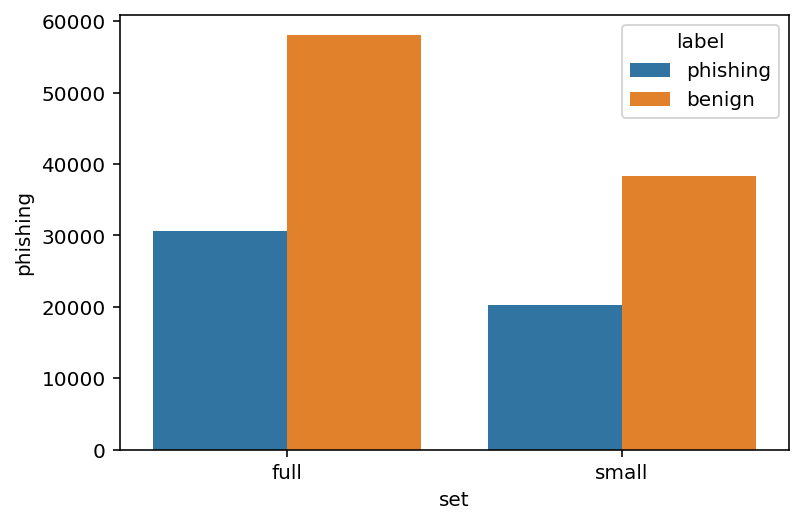

In [85]:
import seaborn as sns
ax = sns.barplot(x="set", y="phishing", data=valid, hue="label")